In [1]:
import urllib
import gzip
import os
import tarfile
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz'
urllib.request.urlretrieve(url, './housing.tgz')

('./housing.tgz', <http.client.HTTPMessage at 0x7f338c2d7a90>)

In [3]:
file = gzip.open('housing.tgz')

In [4]:
tar = tarfile.open("housing.csv.gz", fileobj=file)
tar.extractall()
tar.close()

In [5]:
df = pd.read_csv('housing.csv')

In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df.dtypes['ocean_proximity']

dtype('O')

In [9]:
df.value_counts() # counts of unique rows

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value  ocean_proximity
-124.35    40.54     52.0                1820.0       300.0           806.0       270.0       3.0147         94600.0             NEAR OCEAN         1
-118.19    34.12     35.0                2524.0       749.0           2487.0      679.0       2.4932         167700.0            <1H OCEAN          1
           34.13     52.0                2012.0       458.0           1314.0      434.0       3.9250         180400.0            <1H OCEAN          1
                     50.0                1309.0       302.0           883.0       293.0       3.1287         198000.0            <1H OCEAN          1
           34.12     52.0                679.0        132.0           483.0       163.0       4.2344         162500.0            <1H OCEAN          1
                                                                                                         

In [10]:
df.describe() # some stats

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [21]:
df.hist(bins=50, figsize=(20,15))
plt.show()

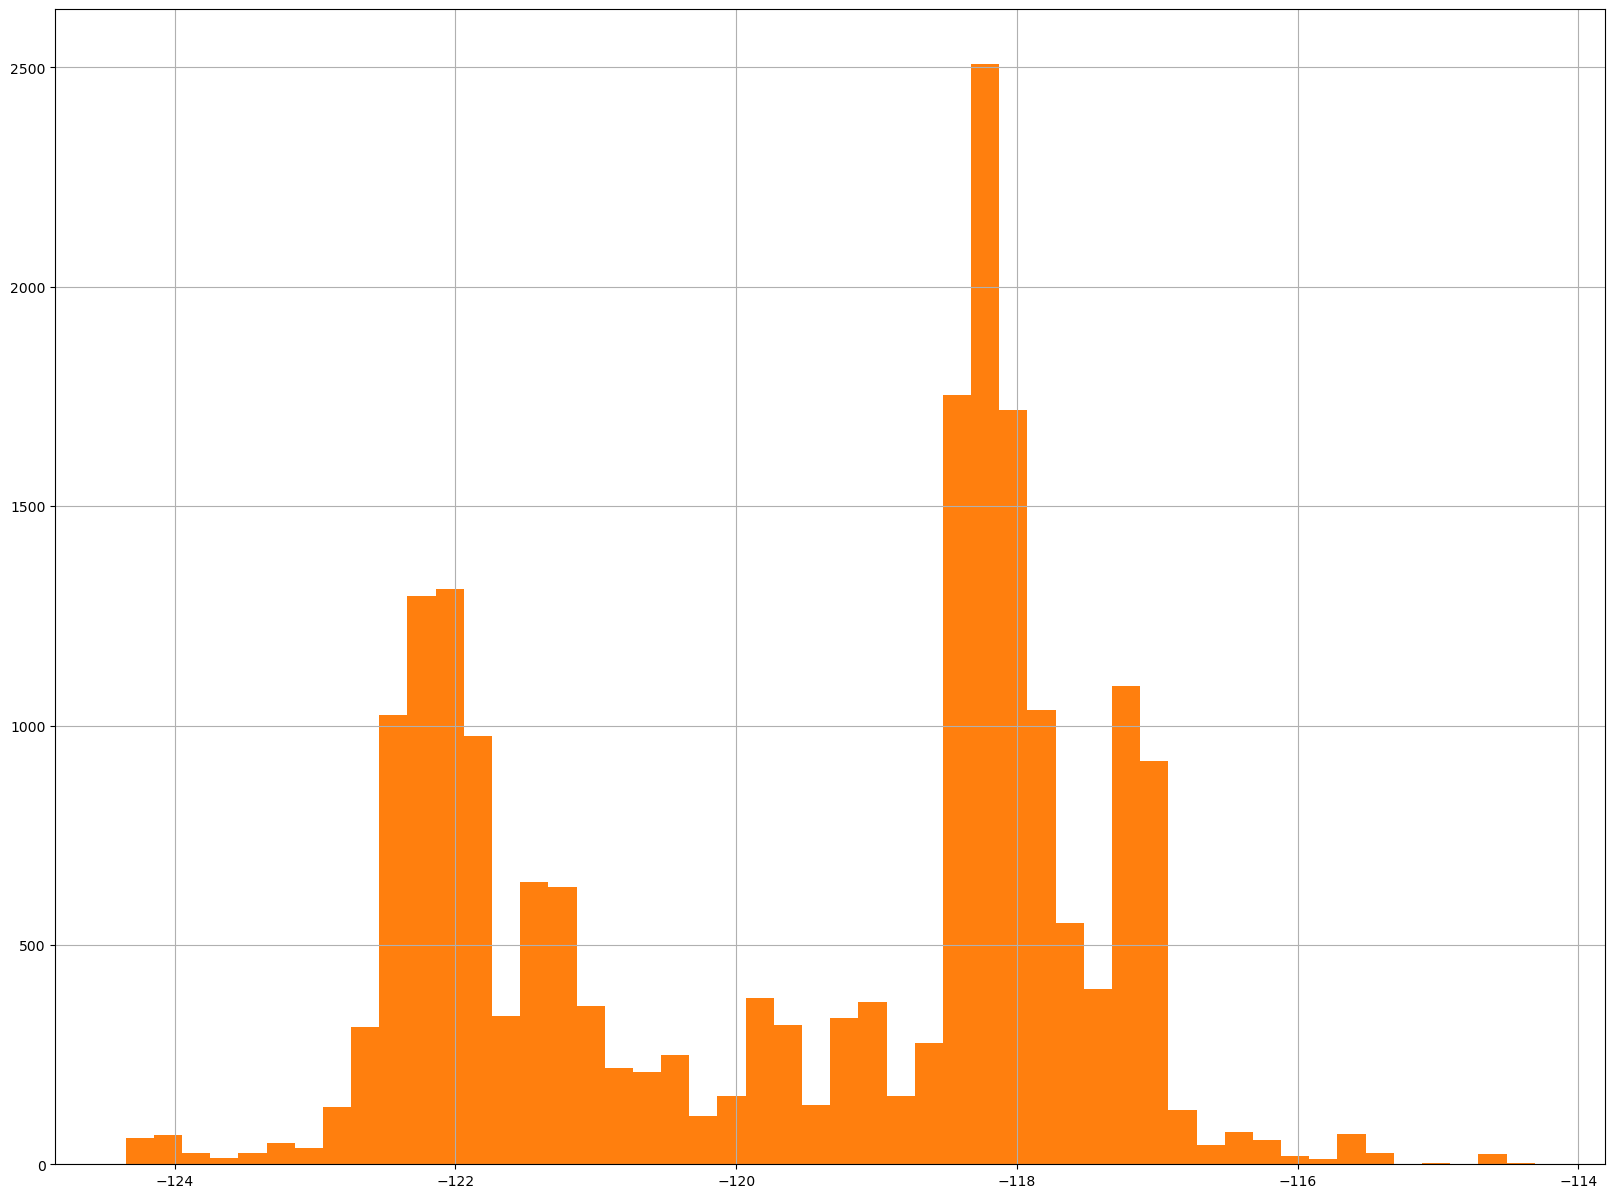

In [30]:
df['longitude'].hist(bins=50, figsize=(20,15))
plt.savefig('obraz1.png')

In [13]:
df.plot(kind="scatter", x="longitude", y="latitude",
        alpha=0.1, figsize=(7,4))
plt.savefig('obraz2.png')

In [15]:
df.plot(kind="scatter", x="longitude", y="latitude",
        alpha=0.4, figsize=(7,3), colorbar=True,
        s=df["population"]/100, label="population", 
        c="median_house_value", cmap=plt.get_cmap("jet"))
plt.savefig('obraz3.png')

In [34]:
df.corr()["median_house_value"].sort_values(ascending=False)

dtype('float64')

In [35]:
df.corr()["median_house_value"].sort_values(ascending=False).to_csv()

',median_house_value\nmedian_house_value,1.0\nmedian_income,0.6880752079585577\ntotal_rooms,0.1341531138065627\nhousing_median_age,0.10562341249321065\nhouseholds,0.0658426505700564\ntotal_bedrooms,0.0496861802473462\npopulation,-0.024649678888894865\nlongitude,-0.0459666151179817\nlatitude,-0.1441602768746574\n'